In [78]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import matplotlib.pyplot as plt
from matplotlib import style

In [20]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [22]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
results = session.query(Measurement. date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [28]:
#  3. Convert the June temperatures to a list.
temps_june = list(results)

In [29]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
temps_june_df = pd.DataFrame(temps_june, columns = ['date', 'June Temps'])

In [30]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
temps_june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [31]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)


In [32]:
# 7. Convert the December temperatures to a list.
temps_dec = list(results)

In [54]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
temps_dec_df = pd.DataFrame(temps_dec, columns = ['date', "December Temps"])

In [55]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
temps_dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Additional Queries

In [68]:
# Write a query that filters the Measurement table to retrieve the rainfall for the month of June.
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()

In [69]:
# Convert the June rainfall to a list.
rain_june = list(results)

In [70]:
# Create a DataFrame from the rainfall list for the month of June. 
rain_june_df = pd.DataFrame(rain_june, columns = ['date', 'June Rainfall'])

In [71]:
# Calculate and print out the summary statistics for the June Rainfall DataFrame.
rain_june_df.describe()

,June Rainfall
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [72]:
# Write a query that filters the Measurement table to retrieve the rainfall for the month of December.
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()

In [73]:
# Convert the December rainfall to a list.
rain_dec = list(results)

In [75]:
# Create a DataFrame from the rainfall list for the month of December. 
rain_dec_df = pd.DataFrame(rain_dec, columns = ['date', 'Dec Rainfall'])

In [76]:
# Calculate and print out the summary statistics for the December Rainfall DataFrame.
rain_dec_df.describe()

,Dec Rainfall
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


## June and December Temperature - Box and Whiskers Plot


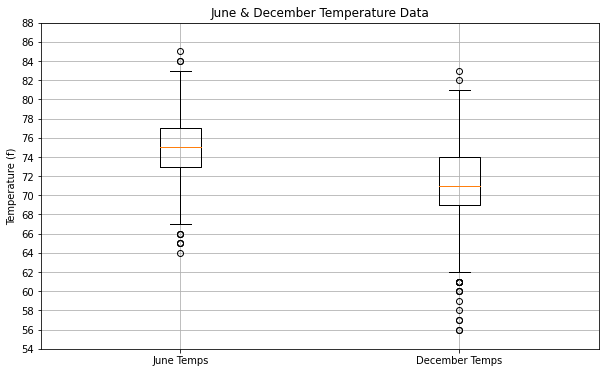

In [93]:
# Create a box-and-whisker plot for the June and December Temperature.
x_labels = ["June Temps", "December Temps"]
temps = [temps_june_df["June Temps"], temps_dec_df["December Temps"]]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(temps, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('June & December Temperature Data')
ax.set_ylabel('Temperature (f)')
ax.set_yticks(np.arange(54, 90, step=2.0))
ax.grid()
plt.savefig("Graphics/JuneDecTempsBoxPlot.png")
plt.show()